# import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# df.describe()
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1

# Train Test Split

In [6]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

In [8]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

# Train Model

In [9]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test data accuracy is ",test_accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Test data accuracy is  0.7142857142857143
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.54      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154



In [11]:
y_pred_train = dt_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train data accuracy is ",train_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Train data accuracy is  1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# plot decision Tree

In [12]:
plt.figure(figsize=(200,150))
tree = plot_tree(decision_tree=dt_model, 
         feature_names=df.columns,
         class_names=['0','1'],filled=True)
print('Decision Tree')
plt.savefig('Decision_Tree.png')

Decision Tree


In [13]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=4)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [14]:
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test data accuracy is ",test_accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Test data accuracy is  0.7337662337662337
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       100
           1       0.60      0.74      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.74       154



In [15]:
y_pred_train = dt_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train data accuracy is ",train_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Train data accuracy is  0.7980456026058632
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       400
           1       0.67      0.84      0.74       214

    accuracy                           0.80       614
   macro avg       0.78      0.81      0.79       614
weighted avg       0.82      0.80      0.80       614



In [16]:
plt.figure(figsize=(200,150))
tree = plot_tree(decision_tree=dt_model, 
         feature_names=df.columns,
         class_names=['0','1'],filled=True)
print('Decision Tree')
plt.savefig('Decision_Tree.png')

Decision Tree


# Hyperparamter Tuning

### 1. GridSearcCV 

In [19]:
dt_model = DecisionTreeClassifier(random_state =1)
dt_model.fit(x_train, y_train)



DecisionTreeClassifier(random_state=1)

In [22]:
hyperparameters = { "criterion" : ['gini','entropy'],
                    "max_depth" : np.arange(2,10),
                    "min_samples_split" : np.arange(2,20),  # branch node
                    "min_samples_leaf": np.arange(1,15)}    # Leaf node

gscv_dt_model = GridSearchCV(dt_model,hyperparameters,cv = 5,)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [23]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [24]:
dt_model = DecisionTreeClassifier(random_state =1,
                              criterion =  'gini',
                             max_depth =  7,
                             min_samples_leaf = 6,
                             min_samples_split = 2)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, random_state=1)

In [26]:
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test data accuracy is ",test_accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Test data accuracy is  0.7467532467532467
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.67      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [27]:
y_pred_train = dt_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train data accuracy is ",train_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Train data accuracy is  0.8534201954397395
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       400
           1       0.83      0.73      0.78       214

    accuracy                           0.85       614
   macro avg       0.85      0.83      0.83       614
weighted avg       0.85      0.85      0.85       614



In [28]:
plt.figure(figsize=(200,150))
tree = plot_tree(decision_tree=dt_model, 
         feature_names=df.columns,
         class_names=['0','1'],filled=True)
print('Decision Tree')
plt.savefig('Decision_Tree_GSCV.png')

Decision Tree


### 2. RandomizedSearchCV

In [33]:
dt_model = DecisionTreeClassifier(random_state =1)
dt_model.fit(x_train, y_train)

hyperparameters = { "criterion" : ['gini','entropy'],
                    "max_depth" : np.arange(2,20),
                    "min_samples_split" : np.arange(2,40),  # branch node
                    "min_samples_leaf": np.arange(1,30)}    # Leaf node

rscv_dt_model = RandomizedSearchCV(dt_model,hyperparameters,cv = 5)
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [34]:
rscv_dt_model.best_params_

{'min_samples_split': 26,
 'min_samples_leaf': 11,
 'max_depth': 9,
 'criterion': 'entropy'}

In [36]:
dt_model = DecisionTreeClassifier(random_state =1,
                              criterion =  'entropy',
                             max_depth =  9,
                             min_samples_leaf = 11,
                             min_samples_split = 26)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=11,
                       min_samples_split=26, random_state=1)

In [37]:
# Test Data Accuracy
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test data accuracy is ",test_accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Test data accuracy is  0.7792207792207793
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [38]:
# Train Data Accuracy
y_pred_train = dt_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train data accuracy is ",train_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Train data accuracy is  0.8420195439739414
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       400
           1       0.79      0.74      0.77       214

    accuracy                           0.84       614
   macro avg       0.83      0.82      0.82       614
weighted avg       0.84      0.84      0.84       614



# Pruning

In [39]:
dt_model = DecisionTreeClassifier(random_state =1,ccp_alpha=0.0)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=1)

In [43]:
values = dt_model.cost_complexity_pruning_path(x_train,y_train)
values
ccp_alpha_list = values['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00135722, 0.00142508, 0.0014477 , 0.0014477 ,
       0.0014806 , 0.00149294, 0.00154723, 0.00157438, 0.00160409,
       0.00161474, 0.00175434, 0.00193027, 0.0019544 , 0.00217155,
       0.00217155, 0.0021987 , 0.00226203, 0.00230205, 0.00231632,
       0.00238505, 0.00243823, 0.002443  , 0.002443  , 0.002443  ,
       0.00252652, 0.00257255, 0.00260586, 0.00260586, 0.0026152 ,
       0.00263506, 0.00267249, 0.0027115 , 0.00283775, 0.00284001,
       0.00285016, 0.0029316 , 0.0029316 , 0.0029316 , 0.00300677,
       0.00315862, 0.00327295, 0.00339305, 0.00346049, 0.0037484 ,
       0.00384586, 0.00391397, 0.00427404, 0.00428243, 0.00463828,
       0.00481021, 0.00500358, 0.00500745, 0.00661636, 0.00778397,
       0.00821741, 0.01140636, 0.01858956, 0.02517158, 0.0871409 ])

In [78]:
train_accuracy = []
test_accuracy = []

for ccp_alpha in ccp_alpha_list:
#     print(ccp_alpha)
    dt_model = DecisionTreeClassifier(random_state =1,ccp_alpha=ccp_alpha)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    test_accuracy.append(dt_model.score(x_test, y_test))


In [79]:
max(test_accuracy)

0.7727272727272727

In [80]:
test_accuracy.index(max(test_accuracy))

47

In [82]:
max(train_accuracy)

1.0

In [81]:
train_accuracy.index(max(train_accuracy))

0

In [60]:
ccp_alpha_list[47]

0.004274040615823919

In [61]:
train_accuracy[47]

0.8534201954397395

In [47]:
dt_model.score(x_train,y_train)

1.0

In [49]:
dt_model.score(x_test,y_test)

0.6948051948051948

<Figure size 1440x720 with 0 Axes>

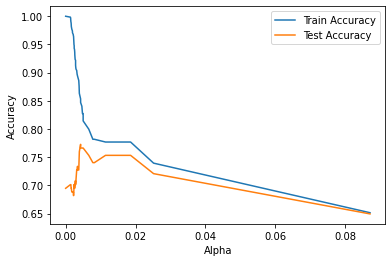

In [70]:
plt.figure(figsize=(20,10))
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy,label = 'Train Accuracy')
ax.plot(ccp_alpha_list,test_accuracy,label = 'Test Accuracy')
ax.set_xlabel('Alpha')
ax.set_ylabel("Accuracy")
ax.legend()

#### Train model with best CCP Alpha Values

In [71]:
dt_model = DecisionTreeClassifier(random_state =1,ccp_alpha=0.004274040615823919)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004274040615823919, random_state=1)

In [72]:
# Test Data Accuracy
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test data accuracy is ",test_accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Test data accuracy is  0.7727272727272727
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [73]:
# Train Data Accuracy
y_pred_train = dt_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train data accuracy is ",train_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Train data accuracy is  0.8534201954397395
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       400
           1       0.79      0.79      0.79       214

    accuracy                           0.85       614
   macro avg       0.84      0.84      0.84       614
weighted avg       0.85      0.85      0.85       614



In [75]:
plt.figure(figsize=(200,150))
tree = plot_tree(decision_tree=dt_model, 
         feature_names=df.columns,
         class_names=['0','1'],filled=True)
print('Decision Tree')
plt.savefig('Decision_Tree_Pruning.png')

Decision Tree
